REGRESSION TASK: COMPARATIVE ANALYSIS OF DIFFERENT MACHINE LEARNING ALGORITHMS FOR PREDICTING CASES OF TYPHOID PER UNIT POPULATION IN DIFFERENT DISTRICTS

Importing libraries

loading the dataset

dataset description

EDA

data preprocessing

feature selection

feature scaling

model training -
hyperparameter tuning for the random forest model

error metrics - mse, mae, rmse, r2 score

IMPORTING LIBRARIES

In [ ]:
# Import libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model selection and evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold , cross_val_predict
from sklearn.feature_selection import RFE

# Import libraries for different regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

# Import library for data preprocessing
from sklearn.preprocessing import StandardScaler

LOADING THE DATASET

In [ ]:
# Load the dataset

# file path to dataset
file_path = "Krigged_Data up to 2017.csv"

# Use pandas to load dataset
df = pd.read_csv(file_path)

# Print the first five rows of the dataset
df.head()

,FID_,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per,OBJECTID
0,NaN,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510,0.206406,0
1,NaN,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953,0.052954,1
2,NaN,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297,0.268251,2
3,NaN,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552,0.091221,3
4,NaN,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152,0.250084,4


DATASET DESCRIPTION

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Print information about the DataFrame, including data types and non-null values
print("\nDataset information:")
df.info()

Dataset shape (rows, columns): (112, 18)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        0 non-null      float64
 1   DNAME_2011  112 non-null    object 
 2   Typh_Inc    112 non-null    int64  
 3   X_coord     112 non-null    float64
 4   Y_coord     112 non-null    float64
 5   HH_Wash     112 non-null    int64  
 6   PH_Lands    112 non-null    int64  
 7   P_Density   112 non-null    float64
 8   Urban_leve  112 non-null    float64
 9   ARainfall   112 non-null    float64
 10  Temp_Max    112 non-null    float64
 11  Temp_Min    112 non-null    float64
 12  Typh_Rate   112 non-null    float64
 13  Pn_Floods   112 non-null    float64
 14  P_male      112 non-null    int64  
 15  P_Female    112 non-null    int64  
 16  Typh_Per    112 non-null    float64
 17  OBJECTID    112 non-null    int64  
dtypes: floa

**DESCRIPTION OF TARGET VARIABLE AND FEATURES.**

Target Variable - 'Typh_Rate'

Features used - 'Typh_Inc',

 'X_coord' - for geospatial information

'Y_coord' - for geospatial information

'HH_Wash' - rep percentage of the population exercising handwashing practise after using toilet

'PH_Lands'

'P_Density'

'Urban_level' - rep the prop of the district that is urban

'ARainfall' - rep the average rainfall amount in mm

'Temp_Max' - rep max temp in a district

'Temp_Min'

'Pn_Floods' - prop of people affected by floods in a district

'P_male' - gender props per district

'P_Female' - gender props per district

'Typh_Per',

'OBJECTID'




### Exploratory Data analysis

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 112
Number of columns: 18


In [ ]:
# Print summary statistics of numerical variables.
summary_stats = df.drop(columns=['OBJECTID']).describe()

summary_stats

,FID_,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per
count,0.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000
mean,NaN,2334.687500,32.398602,1.108921,76.928571,2.026786,297.990179,17.005357,113.266964,28.602679,17.028571,0.006629,4.622321,150397.517857,1.578741e+05,0.902424
std,NaN,7004.813885,1.429334,1.243355,9.710878,2.852089,747.509143,15.589907,14.454585,1.189705,1.238964,0.007833,5.201069,120176.774477,1.315655e+05,2.707562
min,NaN,17.000000,29.681800,-1.222982,51.000000,0.000000,23.000000,1.900000,18.100000,24.700001,12.100000,0.000127,0.000000,31349.000000,2.294400e+04,0.006571
25%,NaN,359.250000,31.254874,0.144675,70.000000,0.000000,105.750000,7.275000,106.325001,27.799999,16.375000,0.001566,1.200000,86153.750000,8.862200e+04,0.138860
50%,NaN,1090.000000,32.526841,1.025632,80.500000,0.000000,216.500000,13.700000,114.149998,28.700001,17.100000,0.004252,3.800000,116810.500000,1.235340e+05,0.421316
75%,NaN,2634.500000,33.683031,1.942605,85.000000,4.000000,297.000000,20.200001,122.825003,29.600000,17.725000,0.008035,5.300000,187371.750000,1.974322e+05,1.018310
max,NaN,73019.000000,34.876671,3.606554,90.000000,10.000000,7928.000000,100.000000,134.399994,30.700001,19.100000,0.048451,33.000000,949035.000000,1.048383e+06,28.223939


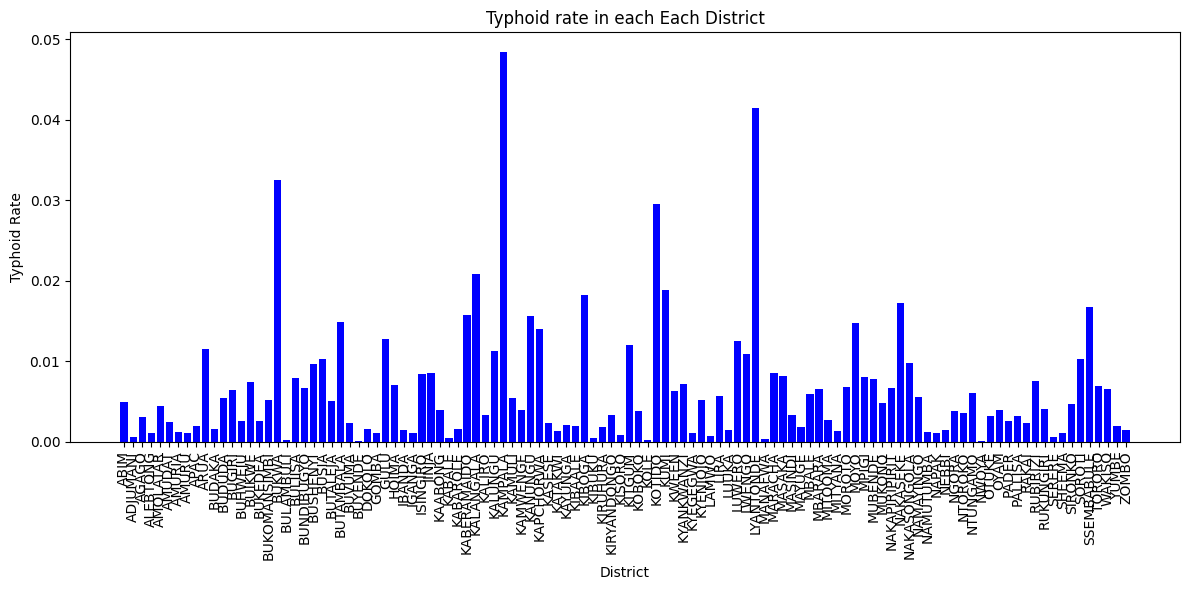

In [ ]:
# Group the data by 'DNAME_2011' and calculate the sum of 'Typh_Inc' for each district
district_typhoid_sum = df.groupby('DNAME_2011')['Typh_Rate'].sum()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(district_typhoid_sum.index, district_typhoid_sum.values, color='blue')
plt.xlabel('District')
plt.ylabel('Typhoid Rate')
plt.title('Typhoid rate in each Each District')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

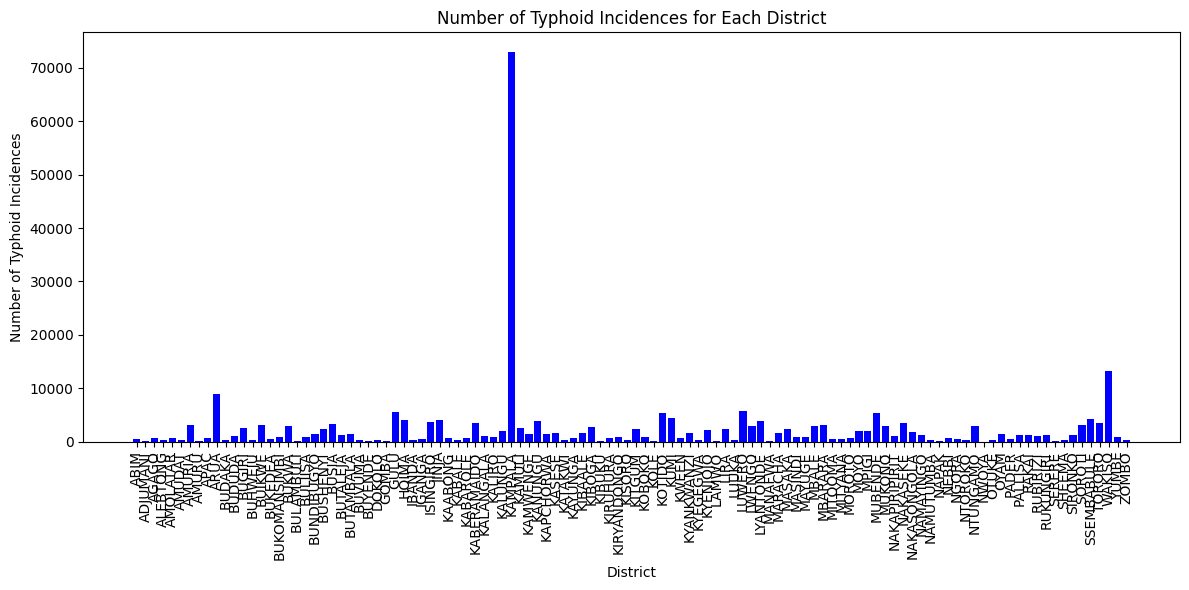

In [ ]:
# Group the data by 'DNAME_2011' and calculate the sum of 'Typh_Inc' for each district
district_typhoid_sum = df.groupby('DNAME_2011')['Typh_Inc'].sum()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(district_typhoid_sum.index, district_typhoid_sum.values, color='blue')
plt.xlabel('District')
plt.ylabel('Number of Typhoid Incidences')
plt.title('Number of Typhoid Incidences for Each District')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

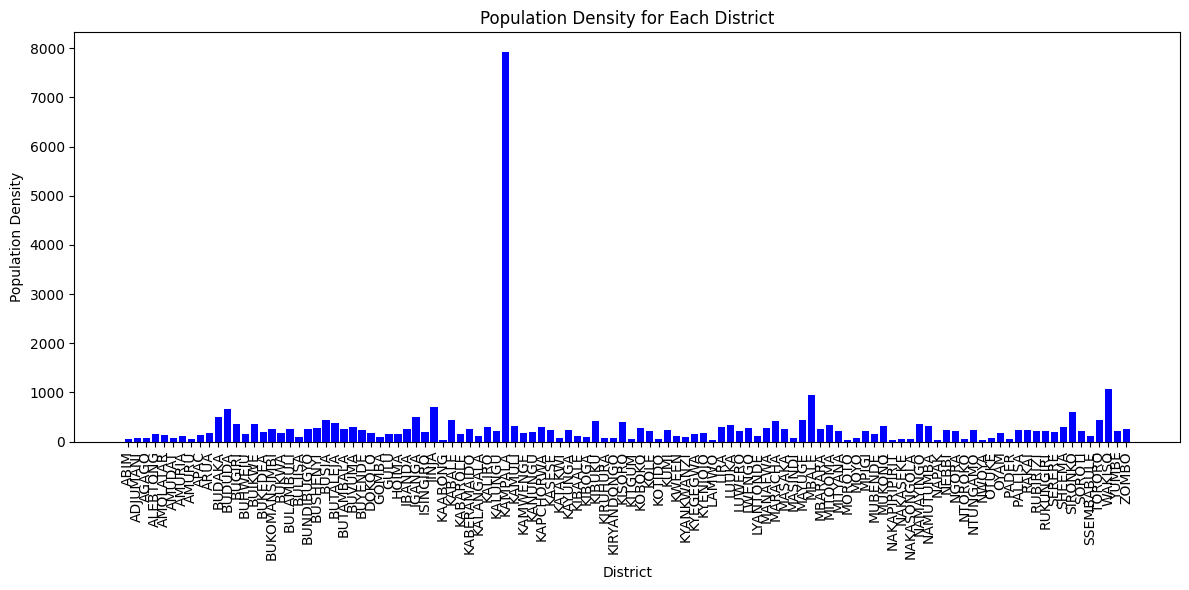

In [ ]:
# Group the data by 'DNAME_2011' and calculate the sum of 'Typh_Inc' for each district
district_typhoid_sum = df.groupby('DNAME_2011')['P_Density'].sum()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(district_typhoid_sum.index, district_typhoid_sum.values, color='blue')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.title('Population Density for Each District')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
correlation = df.drop(columns=['OBJECTID','DNAME_2011']).corr()

# Print the correlation matrix
correlation

,FID_,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per
FID_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Typh_Inc,NaN,1.000000,-0.002766,-0.083669,-0.348169,-0.099212,0.955964,0.605980,0.075148,-0.105946,0.084929,0.612415,0.580199,0.591510,0.604555,1.000000
X_coord,NaN,-0.002766,1.000000,0.385627,-0.023333,-0.169651,0.041117,-0.069066,0.538887,0.366578,0.503116,0.031173,-0.285536,-0.139891,-0.134388,-0.002766
Y_coord,NaN,-0.083669,0.385627,1.000000,0.060830,-0.385799,-0.139350,-0.125952,0.047568,0.825133,0.752915,-0.090024,-0.337269,-0.190971,-0.185449,-0.083669
HH_Wash,NaN,-0.348169,-0.023333,0.060830,1.000000,0.138313,-0.240514,-0.364121,0.011767,0.052731,-0.135360,-0.557860,-0.064432,-0.179703,-0.183290,-0.348169
PH_Lands,NaN,-0.099212,-0.169651,-0.385799,0.138313,1.000000,-0.023254,0.011870,-0.146305,-0.418194,-0.675326,-0.055460,0.298460,-0.104143,-0.088188,-0.099212
P_Density,NaN,0.955964,0.041117,-0.139350,-0.240514,-0.023254,1.000000,0.560543,0.149226,-0.129485,0.010426,0.475358,0.557955,0.539530,0.557189,0.955964
Urban_leve,NaN,0.605980,-0.069066,-0.125952,-0.364121,0.011870,0.560543,1.000000,0.053487,-0.163565,0.043625,0.395811,0.466030,0.562590,0.571923,0.605980
ARainfall,NaN,0.075148,0.538887,0.047568,0.011767,-0.146305,0.149226,0.053487,1.000000,0.079048,0.178642,0.021896,-0.022436,0.088970,0.081819,0.075148
Temp_Max,NaN,-0.105946,0.366578,0.825133,0.052731,-0.418194,-0.129485,-0.163565,0.079048,1.000000,0.742915,-0.154779,-0.449984,-0.182455,-0.179305,-0.105946


<Axes: >

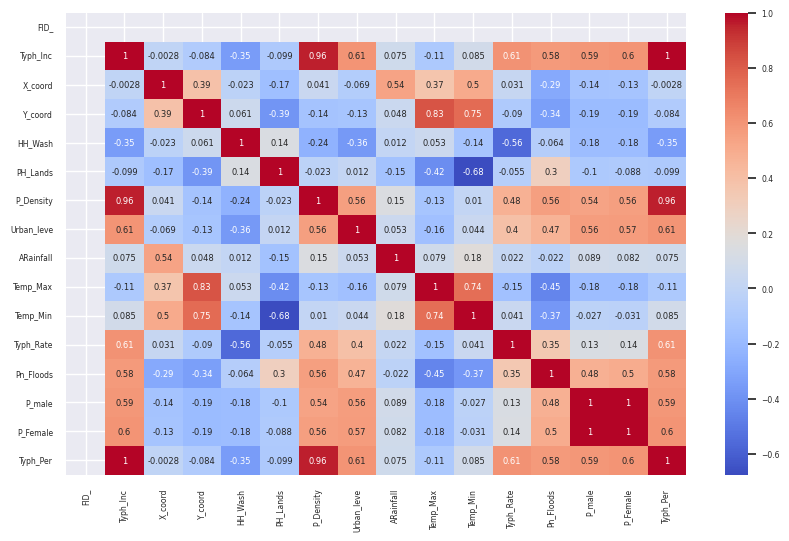

In [ ]:
#Displaying the heatmap
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=0.5)
sns.heatmap(correlation, cmap="coolwarm", annot=True)

Text(0.5, 1.0, 'Variation of Typhoid Rates with the percentage of the population exercising Hand washing after using the toilet')

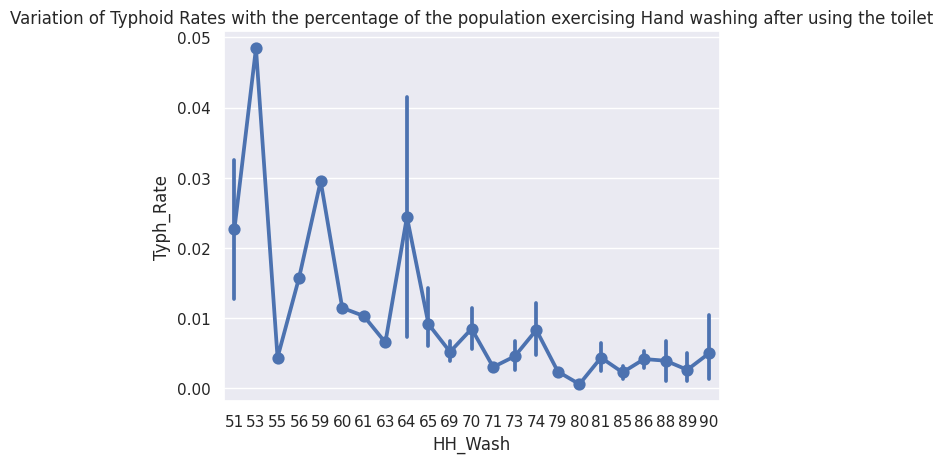

In [ ]:
sns.set(color_codes=True)
sns.pointplot(x=df['HH_Wash'], y=df['Typh_Rate'])
plt.title('Variation of Typhoid Rates with the percentage of the population exercising Hand washing after using the toilet')

DATA PREPROCESSING

In [ ]:
# Columns
df.columns

Index(['FID_', 'DNAME_2011', 'Typh_Inc', 'X_coord', 'Y_coord', 'HH_Wash',
       'PH_Lands', 'P_Density', 'Urban_leve', 'ARainfall', 'Temp_Max',
       'Temp_Min', 'Typh_Rate', 'Pn_Floods', 'P_male', 'P_Female', 'Typh_Per',
       'OBJECTID'],
      dtype='object')

In [ ]:
# Rename the column "Urban_leve" to "Urban_level"
df = df.rename(columns={'Urban_leve': 'Urban_level'})
df.columns

Index(['FID_', 'DNAME_2011', 'Typh_Inc', 'X_coord', 'Y_coord', 'HH_Wash',
       'PH_Lands', 'P_Density', 'Urban_level', 'ARainfall', 'Temp_Max',
       'Temp_Min', 'Typh_Rate', 'Pn_Floods', 'P_male', 'P_Female', 'Typh_Per',
       'OBJECTID'],
      dtype='object')

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

FID_           112
DNAME_2011       0
Typh_Inc         0
X_coord          0
Y_coord          0
HH_Wash          0
PH_Lands         0
P_Density        0
Urban_level      0
ARainfall        0
Temp_Max         0
Temp_Min         0
Typh_Rate        0
Pn_Floods        0
P_male           0
P_Female         0
Typh_Per         0
OBJECTID         0
dtype: int64


In [ ]:
# Drop the column "FID_"
df.drop("FID_", axis=1, inplace=True)

# Drop the column 'Typh_Per' because it has no description in meta data
df.drop("Typh_Per", axis=1, inplace=True)

# Move the column "OBJECTID" to the first position
columns = list(df.columns)
columns.remove("OBJECTID")
columns = ["OBJECTID"] + columns
df = df[columns]
df

,OBJECTID,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_level,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female
0,0,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510
1,1,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953
2,2,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297
3,3,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552
4,4,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,SSEMBABULE,4241,31.340347,-0.025900,70,0,109.0,6.700000,103.900002,27.600000,16.299999,0.016790,3.1,126084,126513
108,108,TORORO,3556,34.082101,0.725155,81,0,433.0,14.000000,130.500000,29.299999,17.000000,0.006877,5.2,250830,266250
109,109,WAKISO,13156,32.446077,0.220433,65,0,1060.0,84.199997,122.099998,26.900000,17.900000,0.006587,21.1,949035,1048383
110,110,YUMBE,919,31.288241,3.520645,70,0,209.0,7.200000,110.099998,29.799999,18.000000,0.001896,5.3,230626,254196


In [ ]:
# Calculate the mean of the column "PH_Lands" excluding zeros
mean_ph_lands = df.loc[df['PH_Lands'] != 0, 'PH_Lands'].mean()

# Replace zero values in the column "PH_Lands" with the mean
df['PH_Lands'] = df['PH_Lands'].replace(0, mean_ph_lands)

df

,OBJECTID,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_level,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female
0,0,ABIM,534,33.730702,2.747649,69,4.00,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510
1,1,ADJUMANI,137,31.769442,3.225610,80,4.54,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953
2,2,AGAGO,694,33.346874,2.909709,71,4.54,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297
3,3,ALEBTONG,236,33.256240,2.267383,85,4.54,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552
4,4,AMOLATAR,647,32.739009,1.619290,55,4.54,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,SSEMBABULE,4241,31.340347,-0.025900,70,4.54,109.0,6.700000,103.900002,27.600000,16.299999,0.016790,3.1,126084,126513
108,108,TORORO,3556,34.082101,0.725155,81,4.54,433.0,14.000000,130.500000,29.299999,17.000000,0.006877,5.2,250830,266250
109,109,WAKISO,13156,32.446077,0.220433,65,4.54,1060.0,84.199997,122.099998,26.900000,17.900000,0.006587,21.1,949035,1048383
110,110,YUMBE,919,31.288241,3.520645,70,4.54,209.0,7.200000,110.099998,29.799999,18.000000,0.001896,5.3,230626,254196


FEATURE SELECTION


In [ ]:
# Split data into features (X) and target variable (y)
X_before = df[['X_coord', 'Y_coord', 'HH_Wash', 'PH_Lands', 'P_Density', 'Urban_level', 'ARainfall', 'Temp_Max', 'Temp_Min', 'Typh_Inc', 'Pn_Floods', 'P_male', 'P_Female']]
Y = df['Typh_Rate']

# Initialize the regression model
reg_model = RandomForestRegressor()

# Initialize RFE
rfe = RFE(reg_model, n_features_to_select=11)

# Fit RFE
rfe.fit(X_before, Y)

# Get selected features
selected_features = X_before.columns[rfe.support_]

# Filter dataset
X = df[selected_features]

print("Top 11 Relevant Features:")
print(selected_features)

Top 11 Relevant Features:
Index(['X_coord', 'HH_Wash', 'P_Density', 'Urban_level', 'ARainfall',
       'Temp_Max', 'Temp_Min', 'Typh_Inc', 'Pn_Floods', 'P_male', 'P_Female'],
      dtype='object')


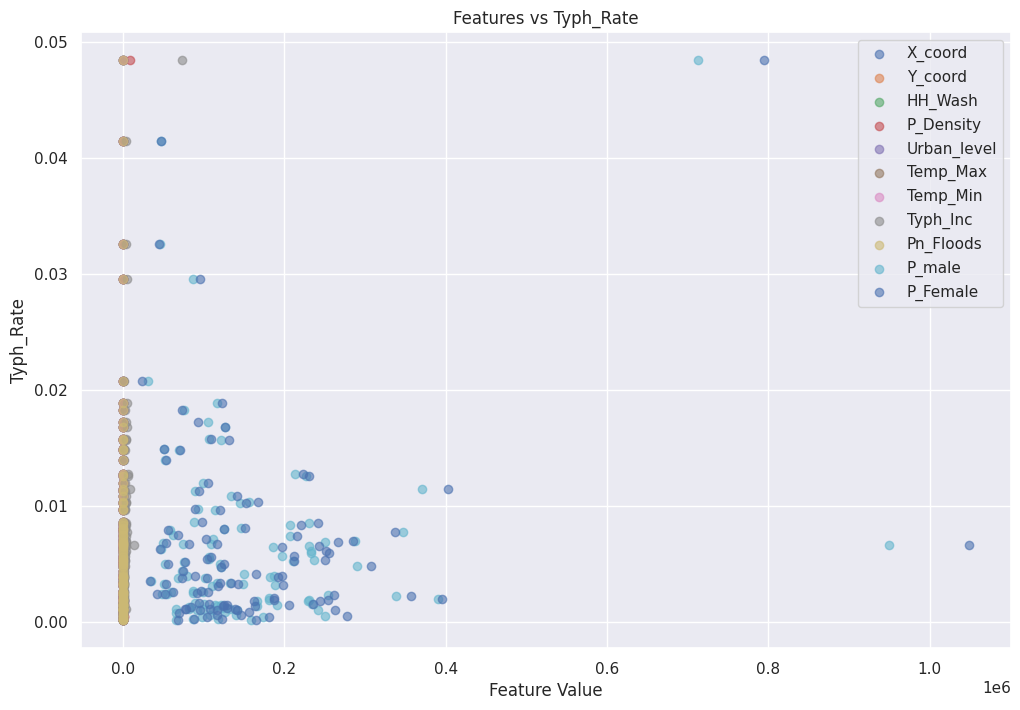

In [ ]:
# Create a single figure and axes
plt.figure(figsize=(12, 8))

# Iterate through each feature in X and create a scatter plot against Y on the same axes
for col in X.columns:
    plt.scatter(X[col], Y, label=col, alpha=0.6)

plt.xlabel("Feature Value")
plt.ylabel("Typh_Rate")
plt.title("Features vs Typh_Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# X is your feature dataframe
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])


Number of rows: 112
Number of columns: 11


In [ ]:
# Kfold cross validation

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Dictionary to store metrics for each model
metrics = {
    "Linear Regression": [],
    "SVR": [],
    "Decision Tree": [],
    "Random Forest": []
}

# 5-fold CV loop
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]

    # Scaling for Linear Regression and SVR
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, Y_train)
    y_pred_lin = lin_reg.predict(X_val_scaled)
    metrics["Linear Regression"].append({
        "MSE": mean_squared_error(Y_val, y_pred_lin),
        "RMSE": np.sqrt(mean_squared_error(Y_val, y_pred_lin)),
        "MAE": mean_absolute_error(Y_val, y_pred_lin),
        "R2": r2_score(Y_val, y_pred_lin)
    })

    # SVR
    svr = SVR()
    svr.fit(X_train_scaled, Y_train)
    y_pred_svr = svr.predict(X_val_scaled)
    metrics["SVR"].append({
        "MSE": mean_squared_error(Y_val, y_pred_svr),
        "RMSE": np.sqrt(mean_squared_error(Y_val, y_pred_svr)),
        "MAE": mean_absolute_error(Y_val, y_pred_svr),
        "R2": r2_score(Y_val, y_pred_svr)
    })

    # Decision Tree (no scaling)
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, Y_train)
    y_pred_dt = dt.predict(X_val)
    metrics["Decision Tree"].append({
        "MSE": mean_squared_error(Y_val, y_pred_dt),
        "RMSE": np.sqrt(mean_squared_error(Y_val, y_pred_dt)),
        "MAE": mean_absolute_error(Y_val, y_pred_dt),
        "R2": r2_score(Y_val, y_pred_dt)
    })

    # Random Forest (no scaling)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, Y_train)
    y_pred_rf = rf.predict(X_val)
    metrics["Random Forest"].append({
        "MSE": mean_squared_error(Y_val, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(Y_val, y_pred_rf)),
        "MAE": mean_absolute_error(Y_val, y_pred_rf),
        "R2": r2_score(Y_val, y_pred_rf)
    })

# Calculate average metrics across folds
for model_name, scores in metrics.items():
    avg_mse = np.mean([s["MSE"] for s in scores])
    avg_rmse = np.mean([s["RMSE"] for s in scores])
    avg_mae = np.mean([s["MAE"] for s in scores])
    avg_r2 = np.mean([s["R2"] for s in scores])

    print(f"\n{model_name} Average Metrics across {k}-folds:")
    print(f"MSE: {avg_mse:.6f}, RMSE: {avg_rmse:.6f}, MAE: {avg_mae:.6f}, R2: {avg_r2:.6f}")



Linear Regression Average Metrics across 5-folds:
MSE: 0.000269, RMSE: 0.011304, MAE: 0.005010, R2: -2.110240

SVR Average Metrics across 5-folds:
MSE: 0.000349, RMSE: 0.018662, MAE: 0.018002, R2: -6.091421

Decision Tree Average Metrics across 5-folds:
MSE: 0.000073, RMSE: 0.008169, MAE: 0.003919, R2: -0.438169

Random Forest Average Metrics across 5-folds:
MSE: 0.000032, RMSE: 0.005462, MAE: 0.002713, R2: 0.456655


hyperparameter tuning

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=1)

# Define 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=kf,                               # <-- use your 5-fold CV
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform hyperparameter tuning across the 5 folds
grid_search.fit(X, Y)   # fit on the entire dataset (CV takes care of splitting)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use cross_val_predict to evaluate on CV predictions
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_model, X, Y, cv=kf)

# Calculate evaluation metrics
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 2.9768325457668787e-05
Root Mean Squared Error (RMSE): 0.005456035690652031
Mean Absolute Error (MAE): 0.0026180295666060277
R-squared (R2) Score: 0.5105014832560506


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # standard regression objective
    random_state=42
)

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated predictions
y_pred = cross_val_predict(xgb_model, X, Y, cv=kf)

# Calculate evaluation metrics
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

# Print results
print("XGBoost Regressor Metrics (5-fold CV):")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


XGBoost Regressor Metrics (5-fold CV):
Mean Squared Error (MSE): 4.4119553592226777e-05
Root Mean Squared Error (RMSE): 0.0066422551586209615
Mean Absolute Error (MAE): 0.003240394355793118
R-squared (R2) Score: 0.2745155896151824
